In [1]:
from random import choices, seed
numberofrolls=1800
seed(9)
dice1=choices([1,2,3,4,5,6],k=numberofrolls)
dice2=choices([1,2,3,4,5,6],k=numberofrolls)

In [2]:
print(dice1[:10])

[3, 3, 1, 6, 1, 4, 6, 1, 4, 4]


In [3]:
dicesum=[dice1[n]+dice2[n] for n in range(numberofrolls) ]

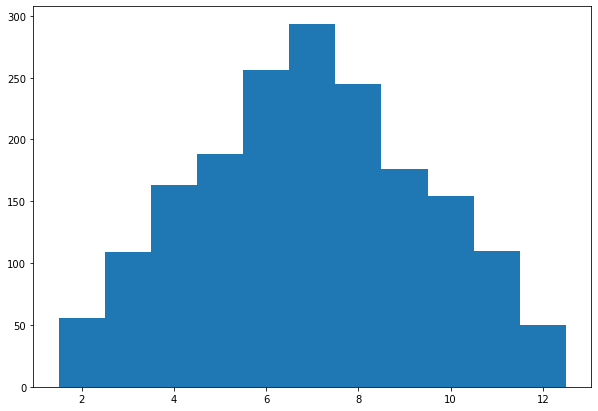

In [5]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax=plt.subplots(figsize=(10,7))
ax.hist(dicesum,bins=[2,3,4,5,6,7,8,9,10,11,12,13],align='left')
plt.show()

In [7]:
def getcenter(allpoints):
    center=np.mean(allpoints)
    stdev=np.sqrt(np.cov(allpoints))
    return(center,stdev)
print(getcenter(dicesum))

(6.9511111111111115, 2.468219092930105)


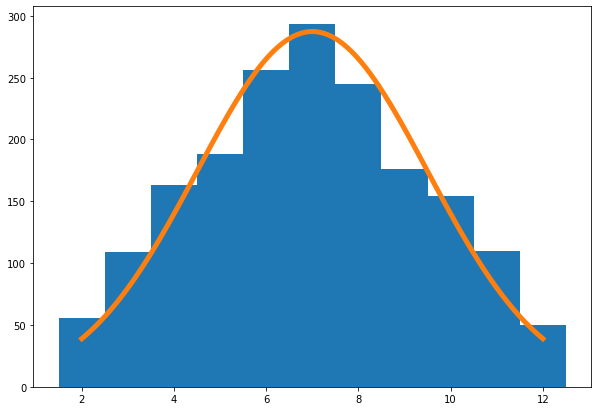

In [9]:
fig,ax=plt.subplots(figsize=(10,7))
ax.hist(dicesum,bins=range(2,14),align='left')
import scipy.stats as stats
import math
mu=7
sigma=2.5
x=np.linspace(mu-2*sigma,mu+2*sigma,100)*1
plt.plot(x,stats.norm.pdf(x,mu,sigma)*numberofrolls,linewidth=5)
plt.show()

In [11]:
stats.norm.pdf(2,mu,sigma)*numberofrolls

38.8734958894954

In [12]:
stats.norm.pdf(7,mu,sigma)*numberofrolls

287.23844188903155

In [13]:
stats.norm.pdf(12,mu,sigma)*numberofrolls

38.8734958894954

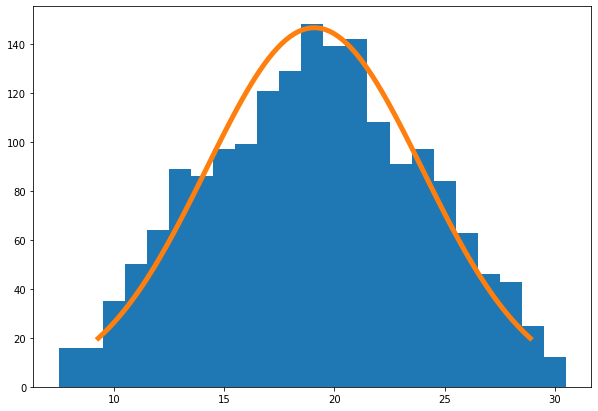

In [14]:
seed(913)
dice1=choices([4,5,6,7,8,9,10,11,12,13,14,15],k=numberofrolls)
dice2=choices([4,5,6,7,8,9,10,11,12,13,14,15],k=numberofrolls)
dicesum12=[dice1[n]+dice2[n] for n in range(numberofrolls)]
fig,ax=plt.subplots(figsize=(10,7))
ax.hist(dicesum12,bins=range(8,32),align='left')
mu=np.mean(dicesum12)
sigma=np.std(dicesum12)
x=np.linspace(mu-2*sigma,mu+2*sigma,100)*1
plt.plot(x,stats.norm.pdf(x,mu,sigma)*numberofrolls,linewidth=5)
plt.show()

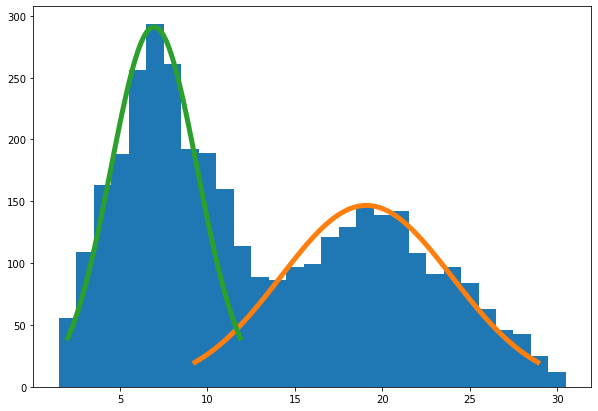

In [15]:
dicesumboth=dicesum+dicesum12
fig,ax=plt.subplots(figsize=(10,7))
ax.hist(dicesumboth,bins=range(2,32),align='left')
import scipy.stats as stats
import math
mu=np.mean(dicesum12)
sigma=np.std(dicesum12)
x=np.linspace(mu-2*sigma,mu+2*sigma,100)*1
plt.plot(x,stats.norm.pdf(x,mu,sigma)*numberofrolls,linewidth=5)
mu=np.mean(dicesum)
sigma=np.std(dicesum)
x=np.linspace(mu-2*sigma,mu+2*sigma,100)*1
plt.plot(x,stats.norm.pdf(x,mu,sigma)*numberofrolls,linewidth=5)
plt.show()

In [16]:
seed(494)
randomselection=choices(dicesumboth,k=1)
print(randomselection)

[12]


In [18]:
stats.norm.pdf(8,np.mean(dicesum),np.std(dicesum))*numberofrolls

265.87855493973007

In [19]:
stats.norm.pdf(8,np.mean(dicesum12),np.std(dicesum12))*numberofrolls

11.289203035758725

In [20]:
stats.norm.pdf(12,np.mean(dicesum),np.std(dicesum))*numberofrolls

35.87586208537935

In [21]:
stats.norm.pdf(12,np.mean(dicesum12),np.std(dicesum12))*numberofrolls

51.42993240324318

In [28]:
from scipy.stats import multivariate_normal
def classify(allpts,allmns,allvar):
    vars=[]
    for n in range(len(allmns)):
        vars.append(multivariate_normal(mean=allmns[n],cov=allvar[n]))
    classification=[]
    for point in allpts:
        this_classification=-1
        this_pdf=0
        for n in range(len(allmns)):
            if vars[n].pdf(point)>this_pdf:
                this_pdf=vars[n].pdf(point)
                this_classification=n+1
        classification.append(this_classification)
    return classification

In [29]:
allpoints=[2,8,12,15,25]
allmeans=[7,19]
allvar=[np.cov(dicesum),np.cov(dicesum12)]

In [30]:
print(classify(allpoints,allmeans,allvar))

[1, 1, 2, 2, 2]


In [31]:
#em(expectation maximization) clustering
import ast
import requests
link="https://bradfordtuckfield.com/emdata.txt"
f=requests.get(link)
allpoints=ast.literal_eval(f.text)

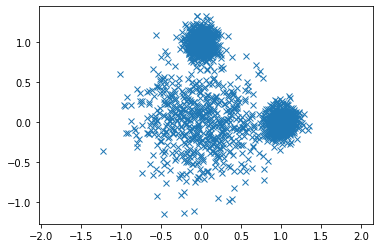

In [32]:
allxs=[point[0] for point in allpoints]
allys=[point[1] for point in allpoints]
plt.plot(allxs,allys,'x')
plt.axis('equal')
plt.show()

In [33]:
#guessing step
mean1=[-1,0]
mean2=[0.5,-1]
mean3=[0.5,0.5]
allmeans=[mean1,mean2,mean3]
cov1=[[1,0],[0,1]]
cov2=[[1,0],[0,1]]
cov3=[[1,0],[0,1]]
allvar=[cov1,cov2,cov3]

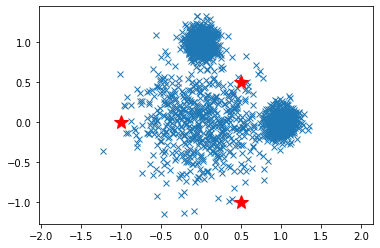

In [35]:
plt.plot(allxs,allys,'x')
plt.plot(mean1[0],mean1[1],'r*',markersize=15)
plt.plot(mean2[0],mean2[1],'r*',markersize=15)
plt.plot(mean3[0],mean3[1],'r*',markersize=15)
plt.axis('equal')
plt.show()

In [36]:
#expectationstep
def classify(allpts,allmns,allvar):
    vars=[]
    for n in range(len(allmns)):
        vars.append(multivariate_normal(mean=allmns[n],cov=allvar[n]))
    classification=[]
    for point in allpts:
        this_classification=-1
        this_pdf=0
        for n in range(len(allmns)):
            if vars[n].pdf(point)>this_pdf:
                this_pdf=vars[n].pdf(point)
                this_classification=n+1
        classification.append(this_classification)
    return classification

In [37]:
theclass=classify(allpoints,allmeans,allvar)

In [38]:
theclass[:10]

[1, 1, 1, 1, 3, 1, 3, 3, 1, 3]

In [39]:
def makeplot(allpoints,theclass,allmeans):
    thecolors=['black']*len(allpoints)
    for idx in range(len(thecolors)):
        if theclass[idx]==2:
            thecolors[idx]='green'
        if theclass[idx]==3:
            thecolors[idx]='yellow'
    allxs=[point[0] for point in allpoints]
    allys=[point[1] for point in allpoints]
    for i in range(len(allpoints)):
        plt.scatter(allxs[i],allys[i],color=thecolors[i])
    for i in range(len(allmeans)):
        plt.plot(allmeans[i][0], allmeans[i][1],'b*',markersize=15)
    plt.axis('equal')
    plt.show()

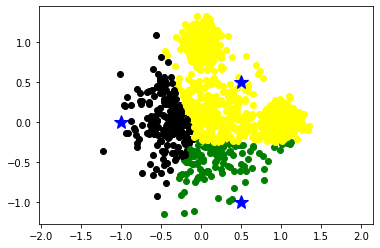

In [40]:
makeplot(allpoints,theclass,allmeans)

In [42]:
#maximazation step
def getcentres(allpoints,theclass,k):
    centres=[]
    thevars=[]
    for n in range(k):
        pointsn=[allpoints[i] for i in range(0,len(allpoints)) if theclass[i]==(n+1)]
        xpointsn=[points[0] for points in pointsn]
        ypointsn=[points[1] for points in pointsn]
        xcenter=np.mean(xpointsn)
        ycenter=np.mean(ypointsn)
        centres.append([xcenter,ycenter])
        thevars.append(np.cov(xpointsn,ypointsn))
    return centres,thevars

In [44]:
allmeans,allvar=getcentres(allpoints,theclass,3)

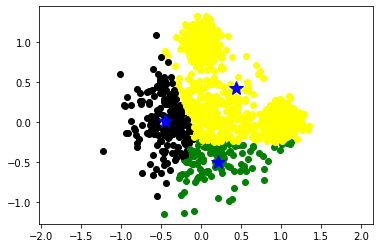

In [45]:
makeplot(allpoints,theclass,allmeans)

In [46]:
theclass=classify(allpoints,allmeans,allvar)

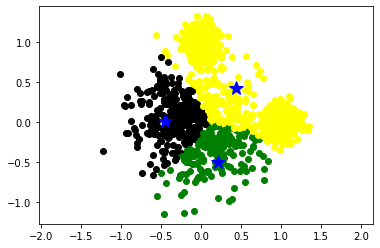

In [47]:
makeplot(allpoints,theclass,allmeans)

In [53]:
#convergence step
for n in range(0,100):
    theclass=classify(allpoints,allmeans,allvar)
    allmeans,allvar=getcentres(allpoints,theclass,3)

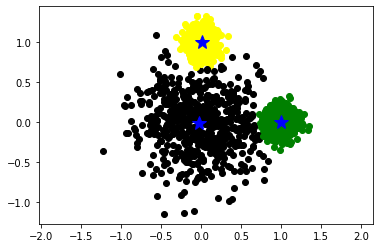

In [54]:
makeplot(allpoints,theclass,allmeans)

In [59]:
from sklearn.cluster import KMeans
kmeans=KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
kmeans.fit(allpoints)
newclass=[label+1 for label in kmeans.labels_]
makeplot(allpoints,newclass,kmeans.cluster_centers_)

C:\Users\Bhagavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


AttributeError: 'NoneType' object has no attribute 'split'